**General Objective**

**To develop and evaluate predictive models for heart disease and determine the most effective model for accurate early detection and clinical decision-making.**

**Specific Objectives**

**To identify and describe the socio-demographic and clinical risk factors associated with heart disease in the study population.**

**To build predictive models for heart disease using logistic regression, decision tree, random forest, Naive Bayes, and support vector machine (SVM).**

**To evaluate and compare the performance of the models using accuracy, sensitivity, specificity, precision, F1-score, and area under the ROC curve (AUC).**

**To select the best-performing model for heart disease prediction and develop a scoring system/tool for clinicians to facilitate timely diagnosis and intervention.**

**To provide recommendations on how predictive analytics can be integrated into healthcare systems for early identification and management of heart disease.**

**Load the required modules**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import janitor
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'janitor'

**Load the dataset**

In [ ]:
df = pd.read_csv("C:/Users/ADMIN/Desktop/Data Science/Datasets/Datasets/hypertension_dataset.csv").clean_names()

**Inspect the dataset**

In [ ]:
df.head(10)

**Data type checks**

In [ ]:
df.dtypes

**Structure of the dataset**

In [ ]:
df.info()

**Unique Values and Cardinality**

In [ ]:
df.nunique()

**Check for missing values**

In [ ]:
df.isnull().sum()

**Drop rows with any missing values**

In [ ]:
df = df.dropna()

**Data type distribution**

In [ ]:
sns.countplot(y=df.dtypes ,data=df)
plt.title("Data type Distribution")
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

**Check for duplicates**

In [14]:
df.duplicated().sum()

0

**Summary Statistics**

In [25]:
df.describe()

,age,salt_intake,stress_score,sleep_duration,bmi
count,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000
mean,50.561551,8.480523,4.885329,6.447386,25.971838
std,19.312269,1.989097,3.137954,1.546794,4.552549
min,18.000000,2.500000,0.000000,1.500000,11.900000
25%,34.000000,7.200000,2.000000,5.400000,22.900000
50%,50.000000,8.500000,5.000000,6.500000,25.800000
75%,67.000000,9.800000,8.000000,7.500000,29.000000
max,84.000000,14.800000,10.000000,11.400000,41.300000


**Distribution of Numerical Variables**

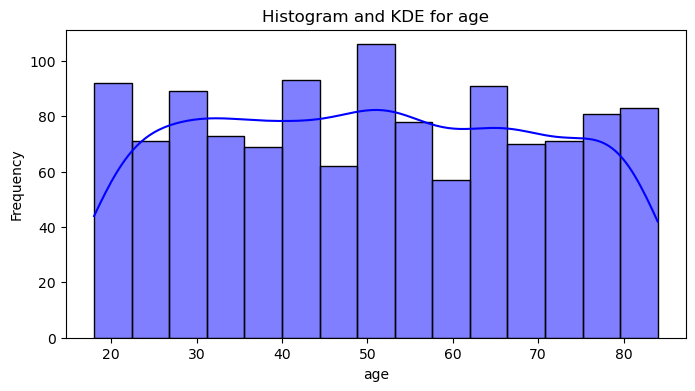

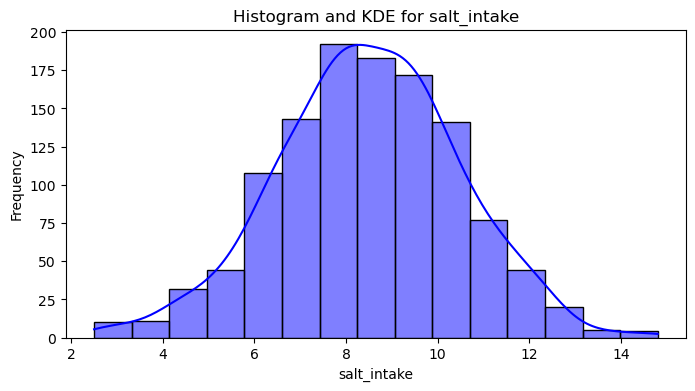

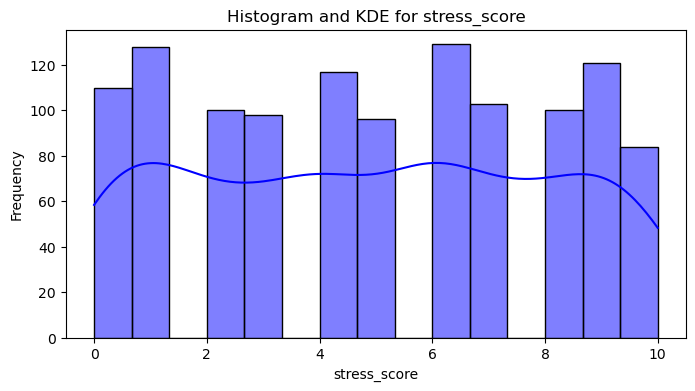

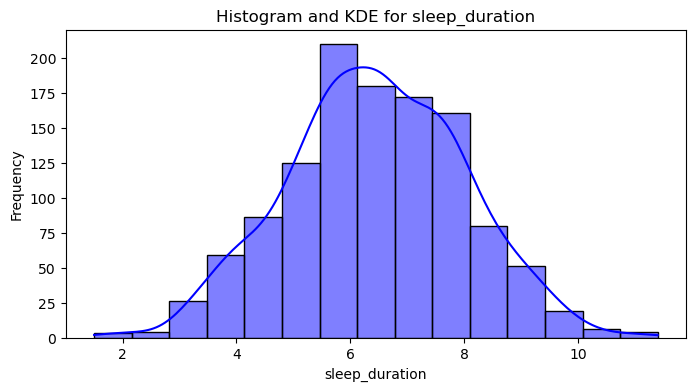

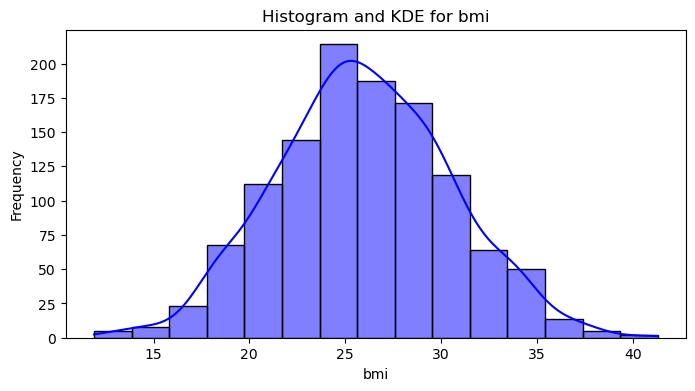

In [16]:
numeric_col = df.select_dtypes(include = ["float64", "int64"])
for col in numeric_col:
    plt.figure(figsize = (8, 4))
    sns.histplot(df[col], kde = True, bins = 15, color = "blue")
    plt.title(f'Histogram and KDE for {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

**Boxplots to Detect Outliers**

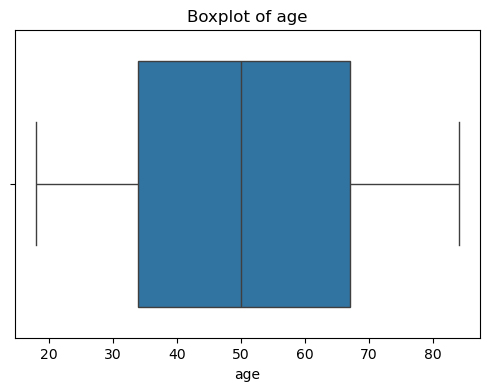

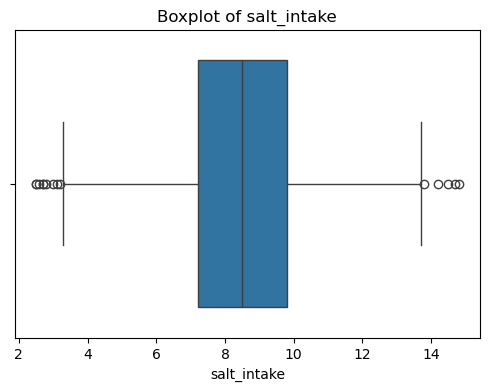

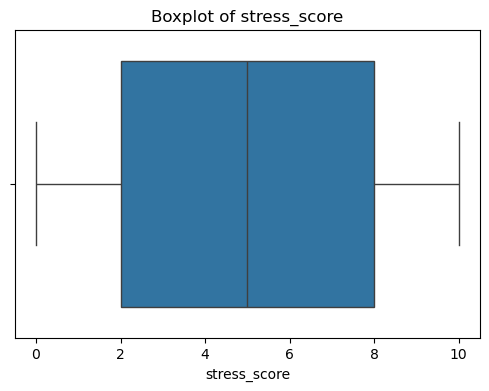

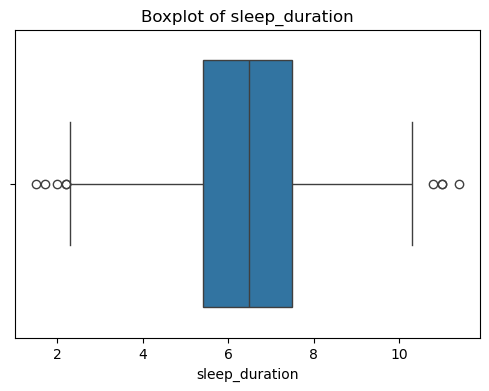

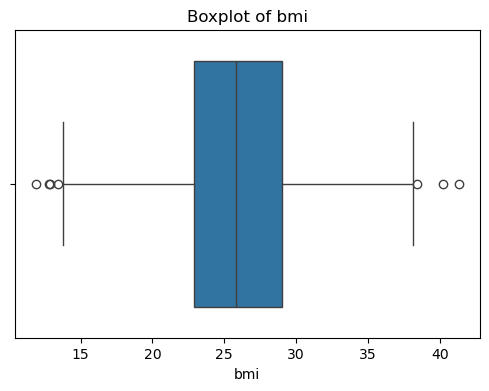

In [17]:
for col in numeric_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**Categorical Data Distribution**

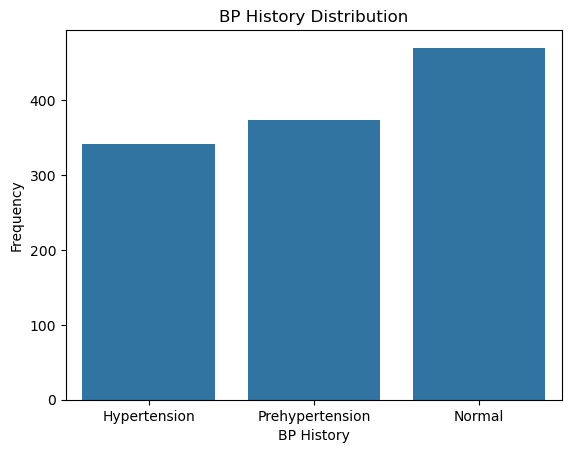

In [18]:
## BP History
sns.countplot(x="bp_history", data=df)
plt.title('BP History Distribution')
plt.ylabel("Frequency")
plt.xlabel("BP History")
plt.show()

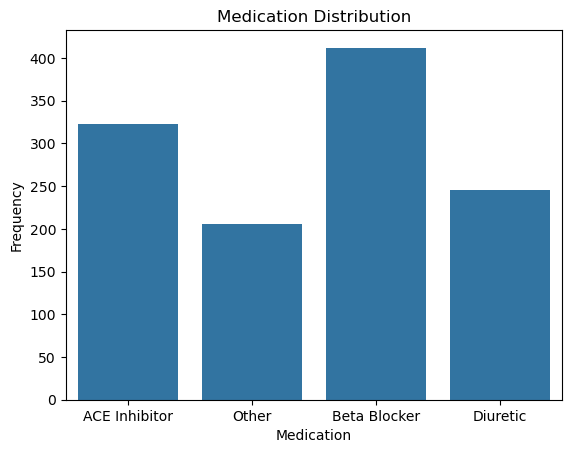

In [19]:
## Medication
sns.countplot(x="medication", data=df)
plt.title('Medication Distribution')
plt.ylabel("Frequency")
plt.xlabel("Medication")
plt.show()

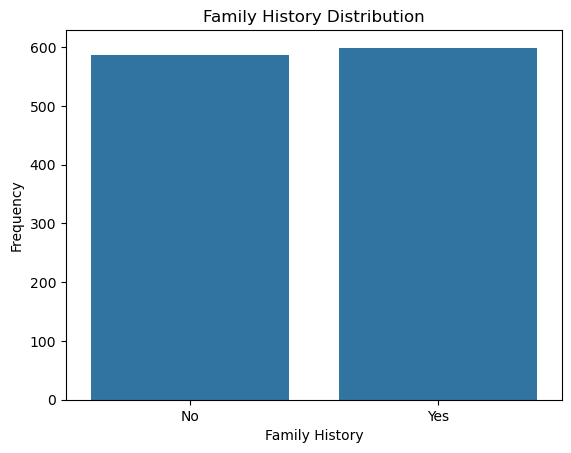

In [20]:
## Family History
sns.countplot(x="family_history", data=df)
plt.title('Family History Distribution')
plt.ylabel("Frequency")
plt.xlabel("Family History")
plt.show()

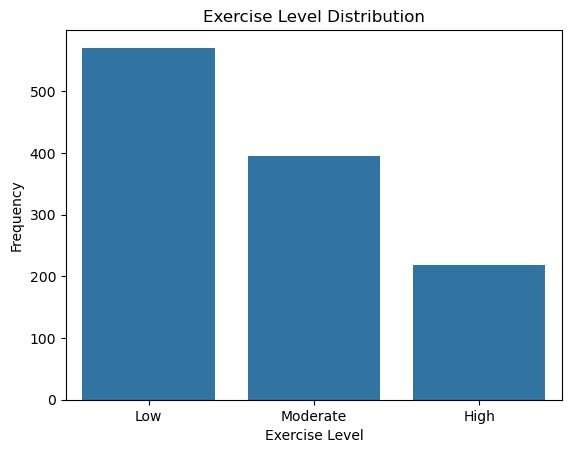

In [21]:
## Exercise Level
sns.countplot(x="exercise_level", data=df)
plt.title('Exercise Level Distribution')
plt.ylabel("Frequency")
plt.xlabel("Exercise Level")
plt.show()

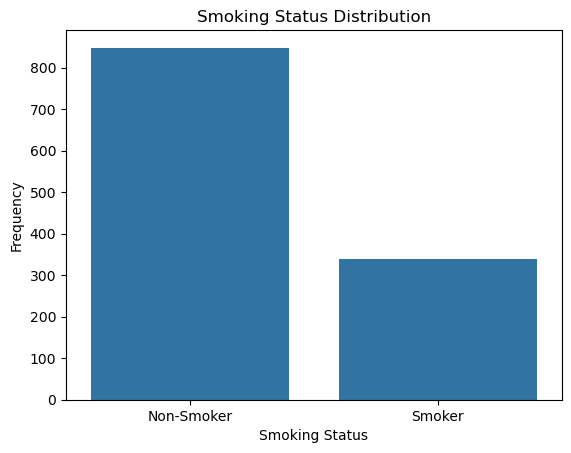

In [22]:
## Smoking Status
sns.countplot(x="smoking_status", data=df)
plt.title('Smoking Status Distribution')
plt.ylabel("Frequency")
plt.xlabel("Smoking Status")
plt.show()

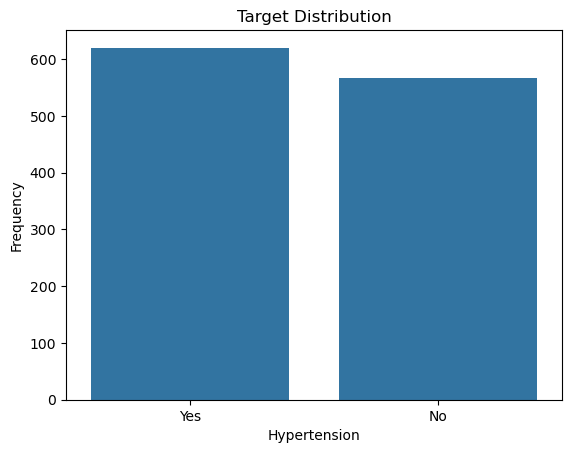

In [23]:
## Target Distribution
sns.countplot(x="has_hypertension", data=df)
plt.title('Target Distribution')
plt.ylabel("Frequency")
plt.xlabel("Hypertension")
plt.show()

**Bivariate Analysis**

**Numerical Features vs Target**

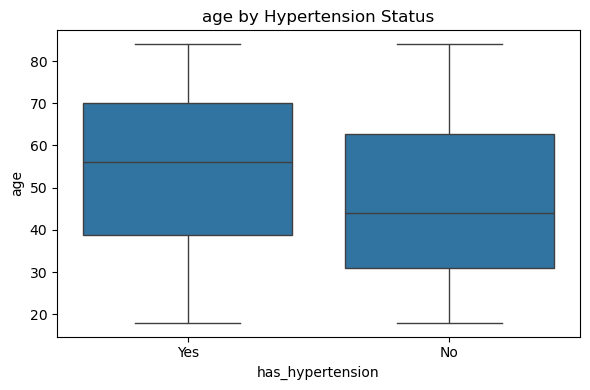

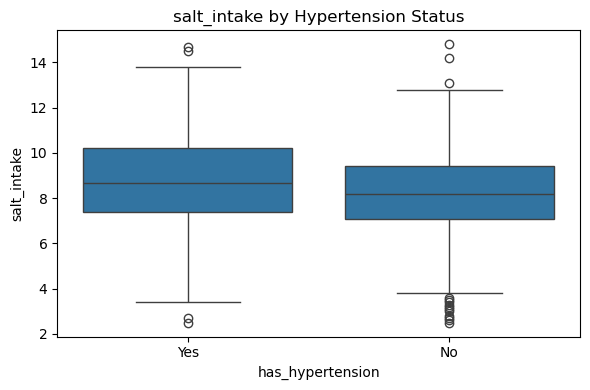

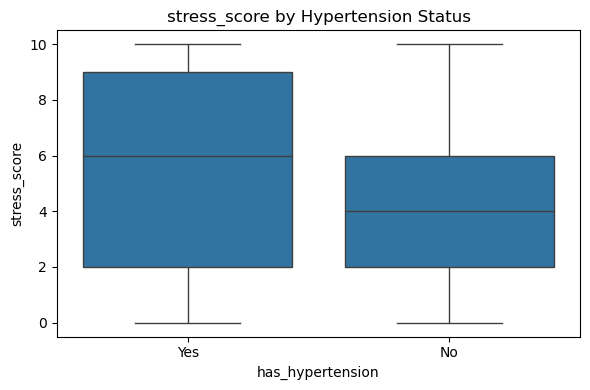

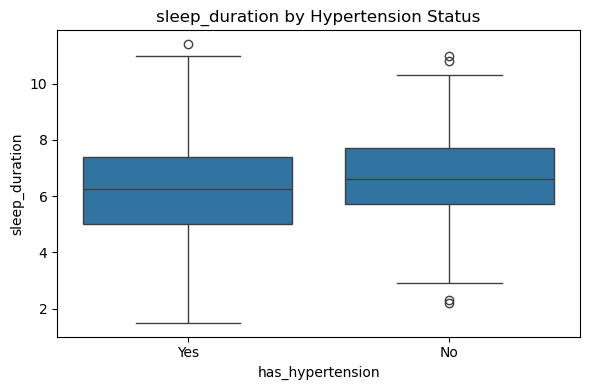

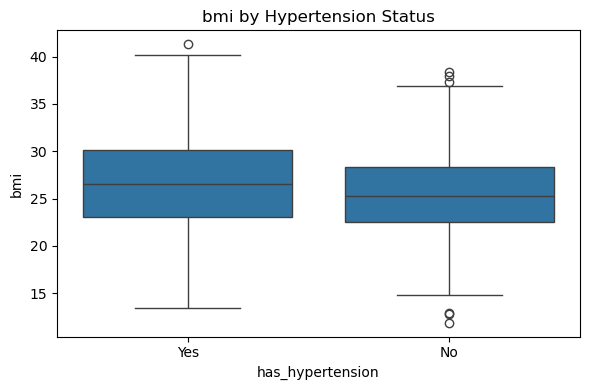

In [24]:
for col in numeric_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='has_hypertension', y=col)
    plt.title(f"{col} by Hypertension Status")
    plt.tight_layout()
    plt.show()

**Correlation Matrix**

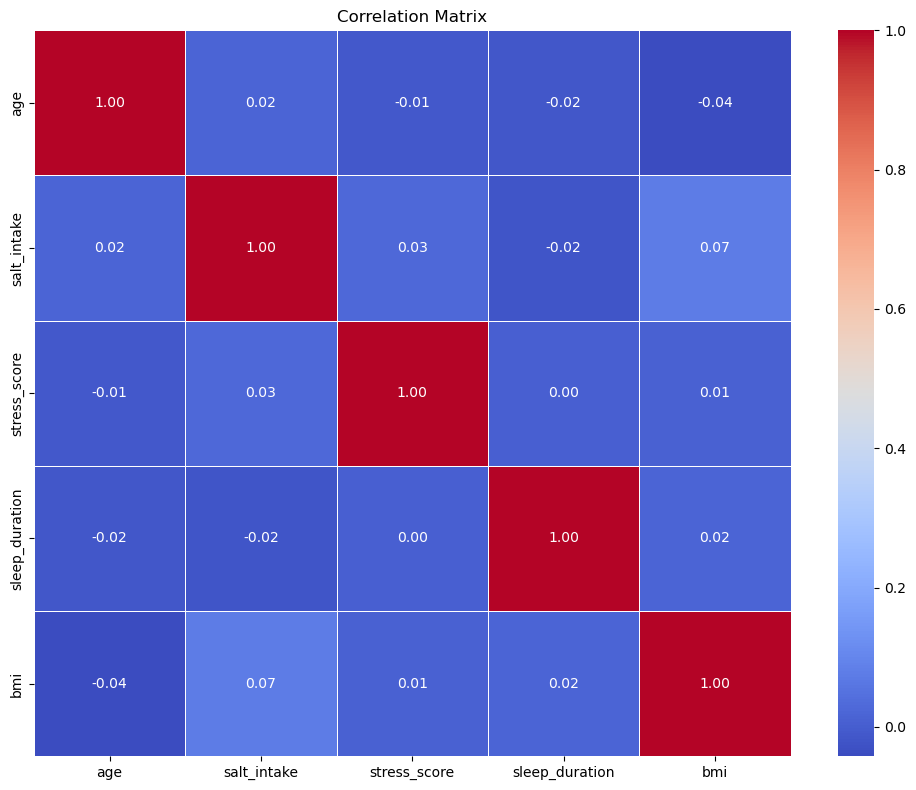

In [27]:
corr_matrix = numeric_col.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

**Chi-square**

**Categorical Features vs Target**

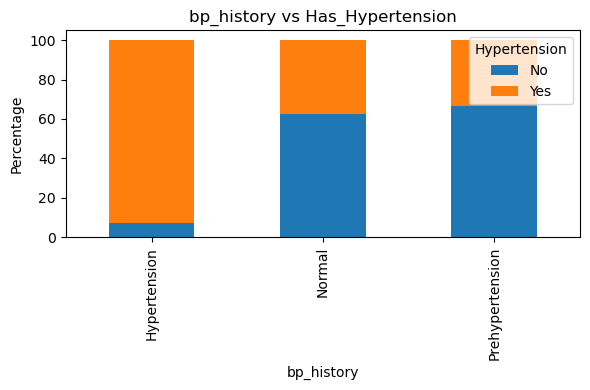

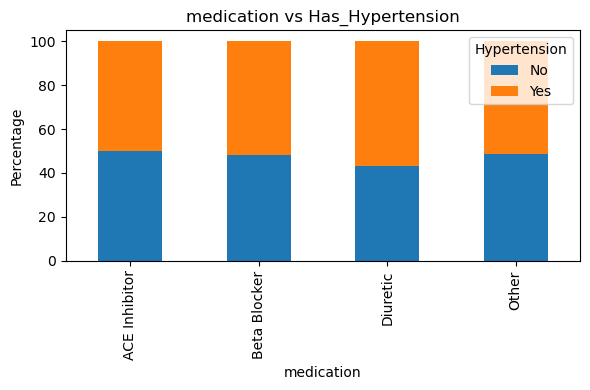

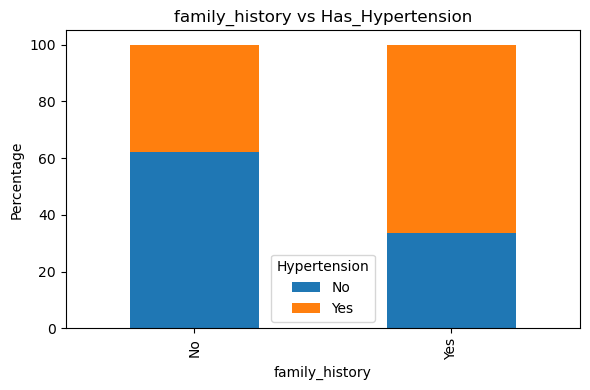

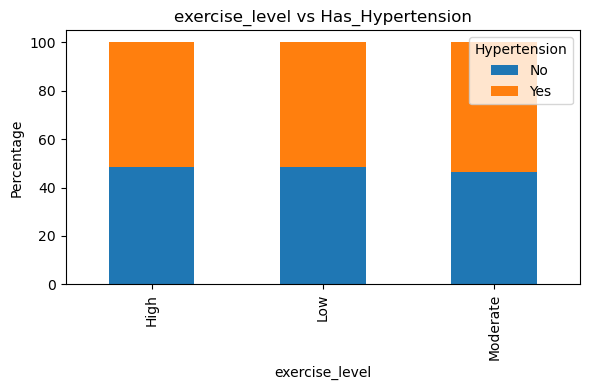

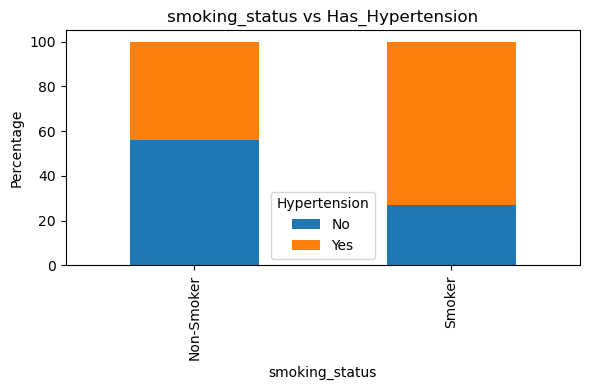

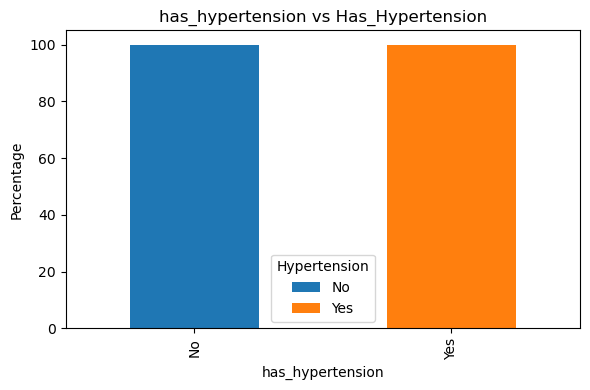

In [29]:
cat_cols = df.select_dtypes(include = "object")
for col in cat_cols[:-1]:  # exclude Has_Hypertension
    ct = pd.crosstab(df[col], df['has_hypertension'], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, figsize=(6, 4))
    plt.title(f"{col} vs Has_Hypertension")
    plt.ylabel("Percentage")
    plt.legend(title='Hypertension')
    plt.tight_layout()
    plt.show()

**Label Encoding**

In [32]:
## Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

## Apply label encoding to all categorical columns
for col in cat_cols:
    df[col] = label.fit_transform(df[col])

**Defining the X and y features**

In [33]:
X = df.drop(columns = ["has_hypertension"])
y = df["has_hypertension"]

**Splitting data into training and test set**

In [35]:
## Load the required module
from sklearn.model_selection import train_test_split

## Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42, test_size = 0.2)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (948, 10)
X_test shape: (238, 10)
y_train shape: (948,)
y_test shape: (238,)


**Feature Scaling/Standardization**

In [36]:
## Load the required module
from sklearn.preprocessing import MinMaxScaler

## Initialize the scaler
scaler = MinMaxScaler()

## Fit the scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Logistic Regression**

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       114
           1       0.80      0.83      0.82       124

    accuracy                           0.81       238
   macro avg       0.81      0.81      0.81       238
weighted avg       0.81      0.81      0.81       238

F1 Score: 0.8060515873015872
Precision: 0.8068892045454545
Recall: 0.8056734578381437
Accuracy: 0.8067226890756303


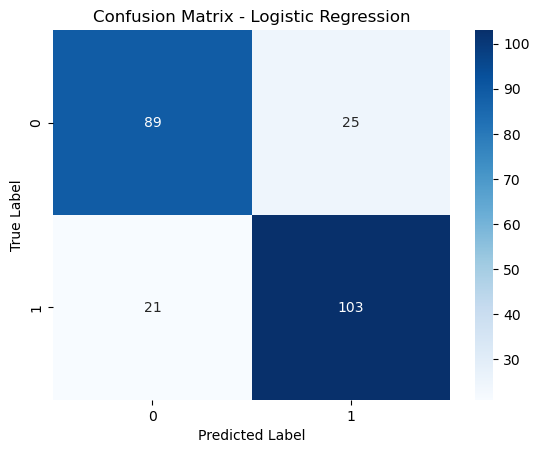

In [37]:
## Load required modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Initialize the model with better configuration
log = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)

## Fit the model
log.fit(X_train, y_train)

## Make predictions
log_pred = log.predict(X_test)
log_score = accuracy_score(y_test, log_pred)

## Evaluate performance
print("Classification Report:\n", classification_report(y_test, log_pred))
print("F1 Score:", f1_score(y_test, log_pred, average='macro'))
print("Precision:", precision_score(y_test, log_pred, average='macro'))
print("Recall:", recall_score(y_test, log_pred, average='macro'))
print("Accuracy:", accuracy_score(y_test, log_pred))

## Confusion Matrix
cm = confusion_matrix(y_test, log_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Decision Trees**

In [38]:
## Load required modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

## Initialize model
dt = DecisionTreeClassifier(random_state=42)

## Define a more efficient parameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'splitter': ['best']
}

## Grid Search
grid_search_dt = GridSearchCV(dt, parameters, cv=5, n_jobs=-1, verbose=1, scoring='f1_macro')
grid_search_dt.fit(X_train, y_train)

## Best model prediction
dt_pred = grid_search_dt.predict(X_test)
dt_score = accuracy_score(y_test, dt_pred)

## Evaluation
print("Best Parameters Found:", grid_search_dt.best_params_)
print("Classification Report:\n", classification_report(y_test, dt_pred))
print("F1 Score:", f1_score(y_test, dt_pred, average='macro'))
print("Precision:", precision_score(y_test, dt_pred, average='macro'))
print("Recall:", recall_score(y_test, dt_pred, average='macro'))
print("Accuracy:", accuracy_score(y_test, dt_pred))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters Found: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       114
           1       0.95      0.95      0.95       124

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238

F1 Score: 0.949490662139219
Precision: 0.949490662139219
Recall: 0.949490662139219
Accuracy: 0.9495798319327731


**Random Forest**

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}
Best Cross-Validated F1 Score: 0.9545587686950257

 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       114
           1       0.97      0.97      0.97       124

    accuracy                           0.97       238
   macro avg       0.97      0.97      0.97       238
weighted avg       0.97      0.97      0.97       238

Accuracy Score: 0.9663865546218487
F1 Score: 0.9663271080928126
Precision: 0.9663271080928126
Recall: 0.9663271080928126


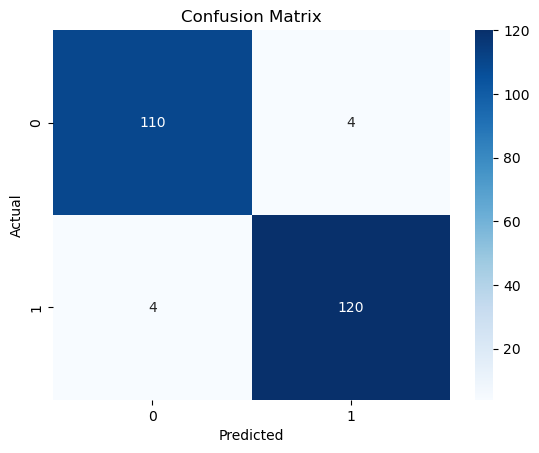

In [39]:
## Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

## Define your model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

## Define a reduced hyperparameter grid
param_dist = {
    'n_estimators': [100, 300, 500, 800],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

## Cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)

## Use RandomizedSearchCV for efficiency
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Try only 20 random combinations
    cv=cv,
    scoring='f1_macro',  # Better than accuracy for imbalanced data
    n_jobs=-1,
    verbose=2,
    random_state=42
)

## Fit the model
best_model = random_search.fit(X_train, y_train)

## Make predictions
rf_pred = best_model.predict(X_test)
rf_score = accuracy_score(y_test, rf_pred)

## Evaluate performance
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated F1 Score:", random_search.best_score_)
print("\n Classification Report:\n", classification_report(y_test, rf_pred))
print("Accuracy Score:", accuracy_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred, average='macro'))
print("Precision:", precision_score(y_test, rf_pred, average='macro'))
print("Recall:", recall_score(y_test, rf_pred, average='macro'))

## Plot the confusion matrix
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Support Vector Machines**

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best Parameters: {'shrinking': True, 'kernel': 'poly', 'gamma': 'scale', 'degree': 3, 'coef0': 0.5, 'C': 1}
Accuracy: 0.8907563025210085
F1 Score (macro): 0.8904778761061947
Precision (macro): 0.8908730158730158
Recall (macro): 0.8902093944538766

 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       114
           1       0.89      0.90      0.90       124

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238



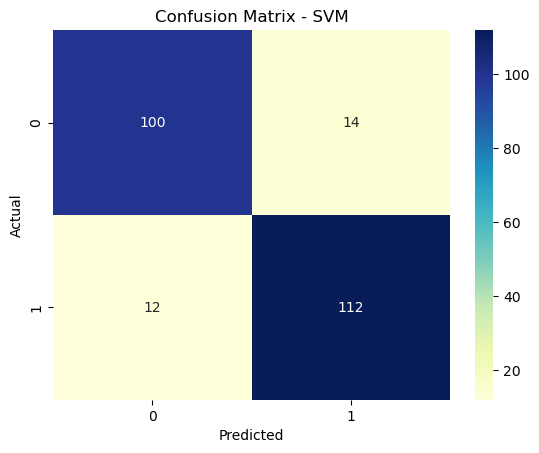

In [40]:
## Import required libraries
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import (classification_report, confusion_matrix,
                             f1_score, precision_score, recall_score, accuracy_score)

## Define CV strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)

## Common SVM model with probability enabled
svm = SVC(probability=True, random_state=42)

## Define separate hyperparameter grids
# RBF Kernel
param_grid_rbf = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'shrinking': [True, False]
}

# Poly Kernel
param_grid_poly = {
    'kernel': ['poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3],
    'coef0': [0.0, 0.5],
    'shrinking': [True, False]
}

# Sigmoid Kernel
param_grid_sigmoid = {
    'kernel': ['sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.5],
    'shrinking': [True, False]
}

## Combine the grids
param_grid_combined = [
    param_grid_rbf,
    param_grid_poly,
    param_grid_sigmoid
]

## Use RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_grid_combined,
    n_iter=20,  # Try 20 random combinations
    scoring='f1_macro',
    n_jobs=-1,
    cv=cv,
    verbose=2,
    random_state=42
)

## Train the model
best_model = random_search.fit(X_train, y_train)

## Make predictions
svm_pred = best_model.predict(X_test)
svm_score = accuracy_score(y_test, svm_pred)

## Evaluate performance
print("Best Parameters:", best_model.best_params_)
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("F1 Score (macro):", f1_score(y_test, svm_pred, average='macro'))
print("Precision (macro):", precision_score(y_test, svm_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, svm_pred, average='macro'))
print("\n Classification Report:\n", classification_report(y_test, svm_pred))

## onfusion matrix visualization
cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**XG Boost Classifier**

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
 Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.3, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 300, 'scale_pos_weight': 1, 'subsample': 0.8}

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       124

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

 F1 Score (macro): 1.0
 Precision (macro): 1.0
 Recall (macro): 1.0
 Accuracy: 1.0

Sample predicted probabilities:
 [[9.4747686e-01 5.2523158e-02]
 [9.2600358e-01 7.3996447e-02]
 [9.6091413e-01 3.9085876e-02]
 [9.7547704e-01 2.4522986e-02]
 [9.3936318e-01 6.0636833e-02]
 [9.9915618e-01 8.4380095e-04]
 [6.4962685e-02 9.3503731e-01]
 [5.3721249e-02 9.4627875e-01]
 [9.9992925e-01 7.0749833e-05]
 [

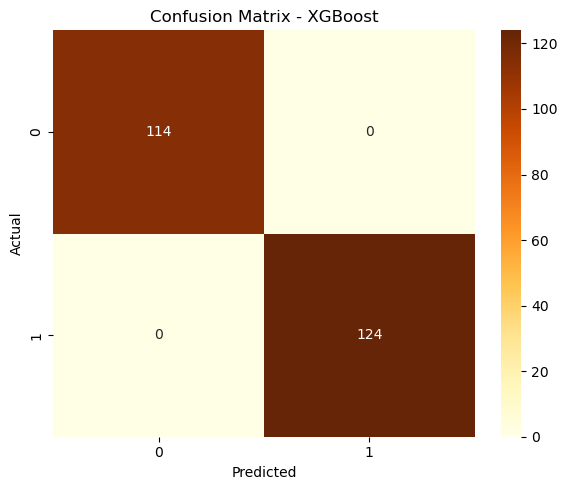

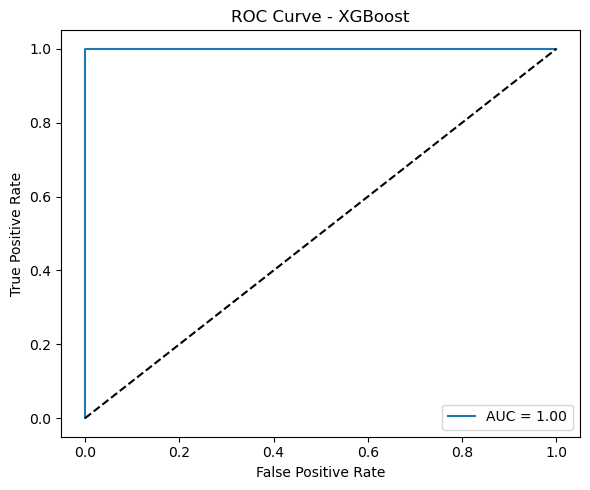

In [41]:
## Load required modules
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import (classification_report, confusion_matrix, 
                             f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns

## Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1],
    'min_child_weight': [1, 5],
    'scale_pos_weight': [1]  
}

## Define cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)

## Initialize the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

## Grid Search
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='f1_macro',
                           cv=cv,
                           n_jobs=-1,
                           verbose=1)

## Fit the model
grid_result = grid_search.fit(X_train, y_train)

## Best estimator
best_xgb = grid_result.best_estimator_

## Predict class labels
xgb_pred = best_xgb.predict(X_test)

## Predict probabilities
xgb_prob = best_xgb.predict_proba(X_test)
xgb_score = accuracy_score(y_test, xgb_pred)

## Get probabilities of the positive class (label = 1)
xgb_prob_positive = xgb_prob[:, 1]

## Evaluate performance
print(" Best Hyperparameters:", grid_result.best_params_)
print("\n Classification Report:\n", classification_report(y_test, xgb_pred))
print(" F1 Score (macro):", f1_score(y_test, xgb_pred, average='macro'))
print(" Precision (macro):", precision_score(y_test, xgb_pred, average='macro'))
print(" Recall (macro):", recall_score(y_test, xgb_pred, average='macro'))
print(" Accuracy:", accuracy_score(y_test, xgb_pred))

## Print some of the predicted probabilities
print("\nSample predicted probabilities:\n", xgb_prob[:10])

## Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='YlOrBr')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## ROC Curve 
if len(set(y_test)) == 2:
    fpr, tpr, thresholds = roc_curve(y_test, xgb_prob_positive)
    auc_score = roc_auc_score(y_test, xgb_prob_positive)
    
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - XGBoost")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()


**K Nearest Neighbors**

Fitting 30 folds for each of 40 candidates, totalling 1200 fits
Best Hyperparameters:
 {'knn__metric': 'manhattan', 'knn__n_neighbors': 21, 'knn__weights': 'distance'}
Best Cross-Validated F1 Macro Score:
 0.8514352183519573

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       114
           1       0.88      0.80      0.84       124

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238

Accuracy Score: 0.8403361344537815
F1 Score (Macro): 0.8403248587570622
Precision (Macro): 0.8427579365079365
Recall (Macro): 0.8421760045274476


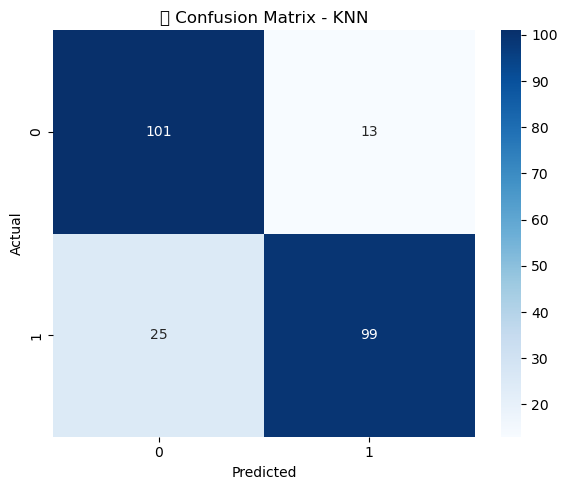

In [42]:
## Load the required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, f1_score, precision_score, recall_score
)

## Define the pipeline 
pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])

## Define hyperparameters to tune
param_grid = {
    'knn__n_neighbors': range(15, 25),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

## Define cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

## Setup Grid Search
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    n_jobs=-1,
    cv=cv,
    scoring='f1_macro',   
    error_score=0,
    verbose=1
)

## Fit the model
best_model = grid_search.fit(X_train, y_train)

## Make predictions
knn_pred = best_model.predict(X_test)
knn_score = accuracy_score(y_test, knn_pred)

## Display best hyperparameters
print("Best Hyperparameters:\n", grid_search.best_params_)
print("Best Cross-Validated F1 Macro Score:\n", grid_search.best_score_)

## Classification metrics
print("\n📊 Classification Report:\n", classification_report(y_test, knn_pred))
print("Accuracy Score:", accuracy_score(y_test, knn_pred))
print("F1 Score (Macro):", f1_score(y_test, knn_pred, average='macro'))
print("Precision (Macro):", precision_score(y_test, knn_pred, average='macro'))
print("Recall (Macro):", recall_score(y_test, knn_pred, average='macro'))

## Confusion matrix plot
cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("🔍 Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

**Gradient Boosting Machines**

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best Parameters:
 {'subsample': 0.6, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.1}
Best CV F1 Score:
 0.9869832864510659

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       114
           1       1.00      0.98      0.99       124

    accuracy                           0.99       238
   macro avg       0.99      0.99      0.99       238
weighted avg       0.99      0.99      0.99       238

Accuracy Score: 0.9915966386554622
F1 Score: 0.9915871332626369
Precision: 0.9913793103448276
Recall: 0.9919354838709677


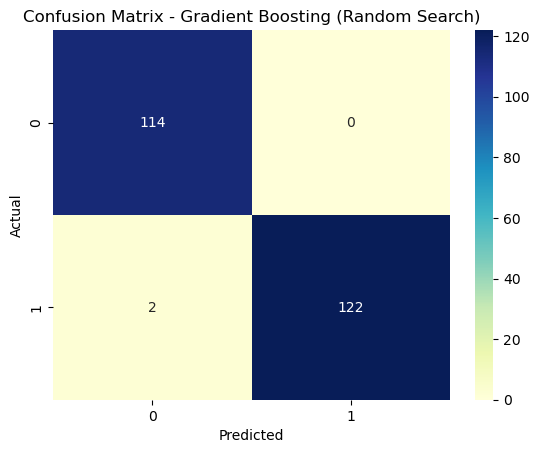

In [43]:
## Import required modules
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Define the model
gbm = GradientBoostingClassifier(random_state=42)

## Define hyperparameter space
param_dist = {
    'n_estimators': np.arange(80, 201, 20),         # 80 to 200 in steps of 20
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## Cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)

## Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gbm,
                                   param_distributions=param_dist,
                                   n_iter=20,                  # try only 20 random combinations
                                   scoring='f1',
                                   n_jobs=-1,
                                   cv=cv,
                                   verbose=1,
                                   random_state=42)

## Fit the model
best_model = random_search.fit(X_train, y_train)

## Predict on test data
gbm_pred = best_model.predict(X_test)
gbm_score = accuracy_score(y_test, gbm_pred)

## Print best hyperparameters and CV score
print("Best Parameters:\n", random_search.best_params_)
print("Best CV F1 Score:\n", random_search.best_score_)

## Evaluation metrics
print("\nClassification Report:\n", classification_report(y_test, gbm_pred))
print("Accuracy Score:", accuracy_score(y_test, gbm_pred))
print("F1 Score:", f1_score(y_test, gbm_pred, average='macro'))
print("Precision:", precision_score(y_test, gbm_pred, average='macro'))
print("Recall:", recall_score(y_test, gbm_pred, average='macro'))

## Confusion Matrix Plot
cm = confusion_matrix(y_test, gbm_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Gradient Boosting (Random Search)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Ada Boost Classifier**

Best Parameters from Grid Search: {'estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 180}
Cross-validation Accuracy: 1.0000 ± 0.0000

=== Evaluation on Test Set ===
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       124

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0


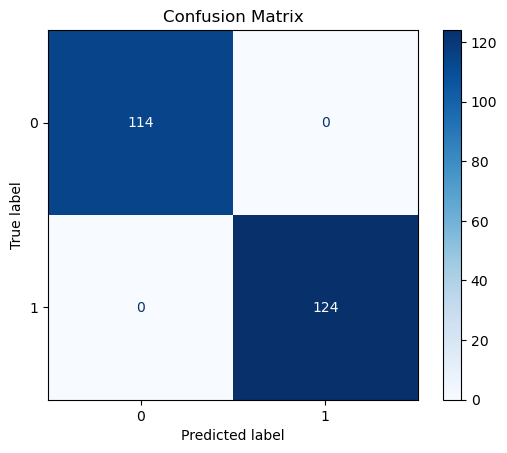

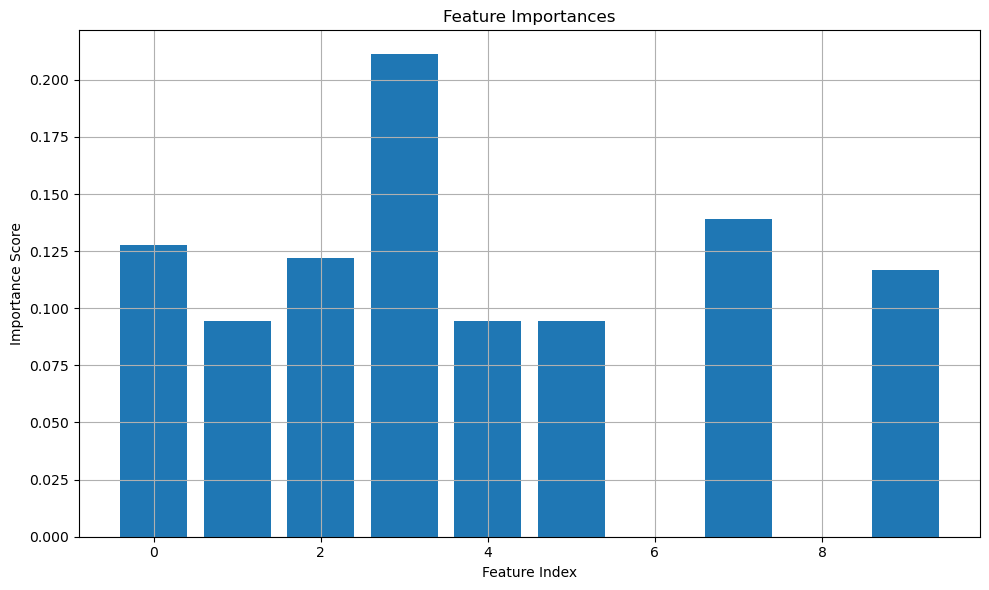

In [44]:
## Import required modules
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np

## Define base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

## Define AdaBoost model
ada = AdaBoostClassifier(estimator=base_estimator, n_estimators=180, learning_rate=1.0)

## Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 180, 250],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 2, 3]
}

grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

## Best model
best_ada = grid_search.best_estimator_
print("Best Parameters from Grid Search:", grid_search.best_params_)

## Cross-validation scores
cv_scores = cross_val_score(best_ada, X_train, y_train, cv=5, scoring='f1_macro')
print(f"Cross-validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

## Fit model on full training set
best_ada.fit(X_train, y_train)

## Predict on test set
ada_pred = best_ada.predict(X_test)
ada_score = accuracy_score(y_test, ada_pred)

## Evaluate model
print("\n=== Evaluation on Test Set ===")
print("Classification Report:\n", classification_report(y_test, ada_pred))
print("Accuracy:", accuracy_score(y_test, ada_pred))
print("F1 Score:", f1_score(y_test, ada_pred, average='macro'))
print("Precision:", precision_score(y_test, ada_pred, average='macro'))
print("Recall:", recall_score(y_test, ada_pred, average='macro'))

## Confusion Matrix
cm = confusion_matrix(y_test, ada_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Feature Importances
importances = best_ada.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(importances)), importances)
plt.title("Feature Importances")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()


**Voting Classifier**

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       114
           1       0.88      0.90      0.89       124

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238

Accuracy: 0.8865546218487395
F1 Score: 0.8862151394422311
Precision: 0.8868908278357097
Recall: 0.8858234295415959


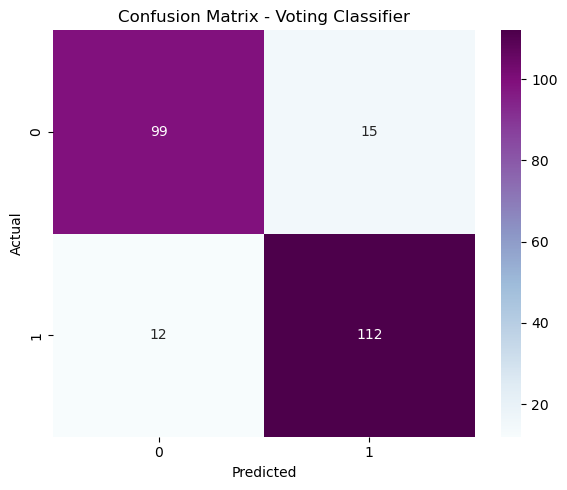

In [45]:
## Load required libraries
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, f1_score, precision_score, recall_score
)
from sklearn.model_selection import RepeatedStratifiedKFold

## Define individual base models
log_clf = LogisticRegression(solver='liblinear', random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

## Combine them into a Voting Classifier (soft voting)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('rf', rf_clf),
        ('ada', ada_clf)
    ],
    voting='soft',  # soft = uses probabilities
    n_jobs=-1
)

## Fit the model
voting_clf.fit(X_train, y_train)

## Make predictions
vote_pred = voting_clf.predict(X_test)
vote_score = accuracy_score(y_test, vote_pred)

## Evaluate
print("Classification Report:\n", classification_report(y_test, vote_pred))
print("Accuracy:", accuracy_score(y_test, vote_pred))
print("F1 Score:", f1_score(y_test, vote_pred, average='macro'))
print("Precision:", precision_score(y_test, vote_pred, average='macro'))
print("Recall:", recall_score(y_test, vote_pred, average='macro'))

## Confusion matrix
cm = confusion_matrix(y_test, vote_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu')
plt.title("Confusion Matrix - Voting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

**Stacking Classifier**

STACKING MODEL PERFORMANCE
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       114
           1       0.98      0.98      0.98       124

    accuracy                           0.97       238
   macro avg       0.97      0.97      0.97       238
weighted avg       0.97      0.97      0.97       238

Accuracy: 0.9747899159663865
F1 Score: 0.9747453310696095
Precision: 0.9747453310696095
Recall: 0.9747453310696095


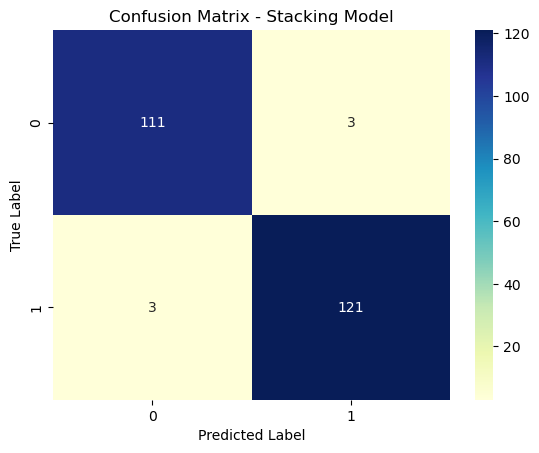

In [46]:
## Import required libraries
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

## Define base models
base_learners = [
    ('logreg', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(C=10, kernel='rbf', gamma='scale', probability=True)),  # SVM needs probability=True for stacking
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
]

## Define the meta-model
meta_learner = LogisticRegression()

## Define the stacking classifier
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1,
    passthrough=False
)

## Fit the model
stack_model.fit(X_train, y_train)

## Make predictions
y_pred = stack_model.predict(X_test)
stack_score = accuracy_score(y_test, y_pred)

## Evaluate performance
print("STACKING MODEL PERFORMANCE")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))

## Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Stacking Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**Stochastic Gradient Descent**

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best Parameters: {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l2'}
Best CV F1 Macro Score: 0.8307553156751663

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79       114
           1       0.80      0.85      0.82       124

    accuracy                           0.81       238
   macro avg       0.81      0.81      0.81       238
weighted avg       0.81      0.81      0.81       238

Accuracy: 0.8109243697478992
F1 Score (Macro): 0.8097116358403069
Precision (Macro): 0.812781954887218
Recall (Macro): 0.8089983022071308


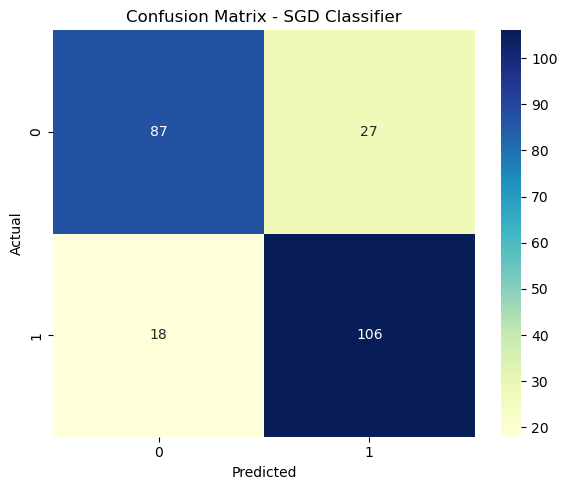

In [47]:
## Load the required modules
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, f1_score, precision_score, recall_score
)

## Initialize the model
sgd = SGDClassifier(random_state=42)

## Define the parameters to tune
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'loss': ['hinge', 'log_loss'],  # 'log_loss' for logistic regression
    'penalty': ['l1', 'l2']
}

## Setup Grid Search
grid_search = GridSearchCV(estimator=sgd,
                           param_grid=param_grid,
                           cv=10,
                           scoring='f1_macro',  # Better for multi-class or imbalanced data
                           n_jobs=-1,
                           verbose=1)

## Fit the model
grid_search.fit(X_train, y_train)

## Make Predictions
sgd_pred = grid_search.predict(X_test)
sgd_score = accuracy_score(y_test, sgd_pred)

## Best parameters and CV score
print("Best Parameters:", grid_search.best_params_)
print("Best CV F1 Macro Score:", grid_search.best_score_)

## Performance evaluation
print("\n📊 Classification Report:\n", classification_report(y_test, sgd_pred))
print("Accuracy:", accuracy_score(y_test, sgd_pred))
print("F1 Score (Macro):", f1_score(y_test, sgd_pred, average='macro'))
print("Precision (Macro):", precision_score(y_test, sgd_pred, average='macro'))
print("Recall (Macro):", recall_score(y_test, sgd_pred, average='macro'))

## Confusion Matrix
cm = confusion_matrix(y_test, sgd_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - SGD Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


**Model Comparison**

In [48]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', "Decision Trees", 'Random Forest Classifier', 'SVM', "XG Boost", 'KNN', "Gradient Boosting", "Ada Boost Classifier", 'Voting Classifier', 'Stacking Classifier',
             'Stachastic Gradient Boosting'],
    'Score': [log_score, dt_score, rf_score, svm_score, xgb_score, knn_score, gbm_score, ada_score, vote_score, stack_score, sgd_score]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,XG Boost,1.000000
7,Ada Boost Classifier,1.000000
6,Gradient Boosting,0.991597
9,Stacking Classifier,0.974790
2,Random Forest Classifier,0.966387
1,Decision Trees,0.949580
3,SVM,0.890756
8,Voting Classifier,0.886555
5,KNN,0.840336
10,Stachastic Gradient Boosting,0.810924


**Best model - XGBoost**

**SHAP Values for Deeper Interpretability**

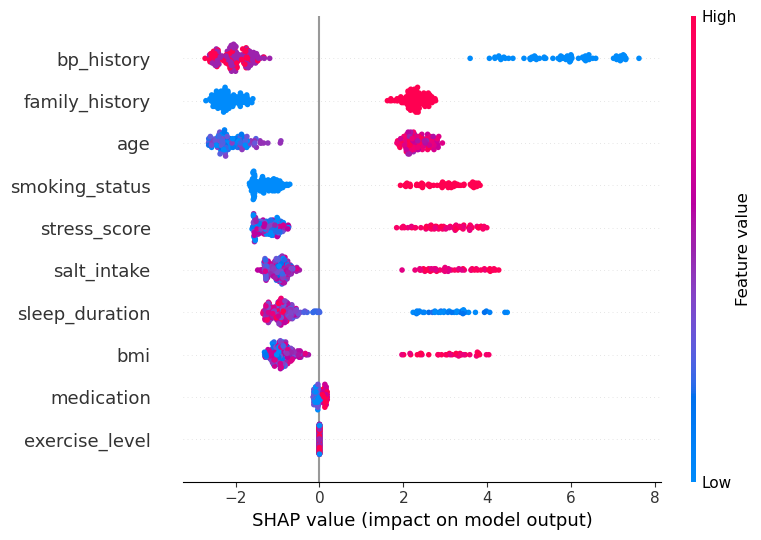

In [50]:
feature_names = [
    'age',
    'salt_intake',
    'stress_score',
    'bp_history',
    'sleep_duration',
    'bmi',
    'medication',
    'family_history',
    'exercise_level',
    'smoking_status',
]

import shap

# Create SHAP explainer (assuming best_xgb is your trained XGBoost model)
explainer = shap.Explainer(best_xgb)

# Compute SHAP values for X_test
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


**Bar Charts**

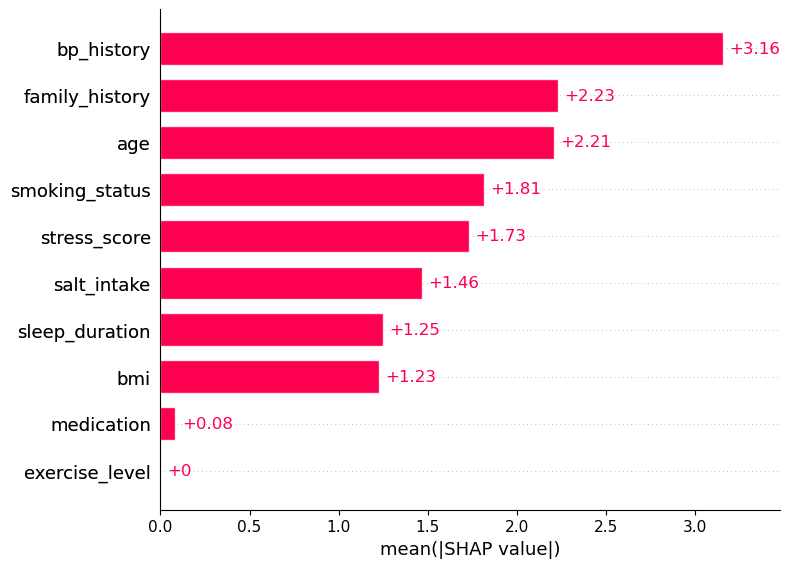

In [52]:
import pandas as pd
import shap

## Define feature names
feature_names = [
    'age',
    'salt_intake',
    'stress_score',
    'bp_history',
    'sleep_duration',
    'bmi',
    'medication',
    'family_history',
    'exercise_level',
    'smoking_status',
]

## Convert X_test to DataFrame with these column names
X_test_df = pd.DataFrame(X_test, columns=feature_names)

## Create SHAP Explainer using trained model
explainer = shap.Explainer(best_xgb)  # or shap.TreeExplainer(best_xgb) if it's an XGBoost Booster

## Compute SHAP values
shap_values = explainer(X_test_df)

## Plot SHAP bar chart for global importance
shap.plots.bar(shap_values, max_display=10)


In [53]:
import pickle

# Save model to .sav format
with open('hypertension_xgb_model.sav', 'wb') as f:
    pickle.dump(best_xgb, f)